In [110]:
import numpy as np
def merge_batch_files(batch_files, output_npz, param_names):
    """合并所有批次文件"""
    all_hitsE = []
    all_hitsM = []
    all_params = []

    for batch_file in batch_files:
        data = np.load(batch_file, allow_pickle=True)
        all_hitsE.extend(data["hitsE"])
        all_hitsM.extend(data["hitsM"])
        all_params.extend(data["params"])

    np.savez_compressed(output_npz,
                        hitsE=np.array(all_hitsE, dtype=object),
                        hitsM=np.array(all_hitsM, dtype=object),
                        params=np.array(all_params, dtype=object),
                        param_names=param_names)
    print(f"All data saved to: {output_npz}")

def sample_data(file_path, output_npz, batch_size=(-1, 1000, 1000)):
    """
    从合并后的 npz 文件中随机抽样指定数量的 monopole、gamma、proton 事件。
    
    参数：
        file_path: str
            输入 npz 文件路径（由 merge_batch_files 生成的最终文件）
        output_npz: str
            输出抽样 npz 文件路径
        batch_size: tuple
            (n_monopole, n_gamma, n_proton)
            若为 -1 则表示使用该类的全部样本
    """
    data = np.load(file_path, allow_pickle=True)
    hitsE_all, hitsM_all, params_all, param_names = (
        data["hitsE"], data["hitsM"], data["params"], data["param_names"]
    )

    params_all = np.array(params_all, dtype=object)
    labels = np.array([p[0] for p in params_all])  # label 是 params 的第一个元素

    # 定义类别映射
    label_map = {
        43: ("monopole", batch_size[0]),
        1:  ("gamma", batch_size[1]),
        14: ("proton", batch_size[2])
    }

    selected_hitsE, selected_hitsM, selected_params = [], [], []

    for label_value, (label_name, n_sample) in label_map.items():
        idx = np.where(labels == label_value)[0]
        total = len(idx)
        if total == 0:
            print(f"[WARN] No samples found for label={label_value} ({label_name})")
            continue

        if n_sample == -1 or n_sample > total:
            n_sample = total

        chosen = np.random.choice(idx, size=n_sample, replace=False)
        print(f"[INFO] Selected {n_sample}/{total} {label_name} events")

        selected_hitsE.extend(hitsE_all[chosen])
        selected_hitsM.extend(hitsM_all[chosen])
        selected_params.extend(params_all[chosen])

    np.savez_compressed(
        output_npz,
        hitsE=np.array(selected_hitsE, dtype=object),
        hitsM=np.array(selected_hitsM, dtype=object),
        params=np.array(selected_params, dtype=object),
        param_names=param_names
    )

    print(f"[DONE] Saved sampled dataset to: {output_npz}")

npzfile_list=[
                "/home/zhonghua/data/Dataset_Filted/1e10_V03/Gamma_combined_filted_1e10_V03_12_13_dataset.npz",
                "/home/zhonghua/data/Dataset_Filted/1e10_V03/Gamma_combined_filted_1e10_V03_13_14_dataset.npz",
                "/home/zhonghua/data/Dataset_Filted/1e10_V03/Gamma_combined_filted_1e10_V03_14_15_dataset.npz",
                "/home/zhonghua/data/Dataset_Filted/1e10_V03/Gamma_combined_filted_1e10_V03_15_16_dataset.npz",
                "/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_combined_filted_1e10_V03_12_13_dataset.npz",
                "/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_combined_filted_1e10_V03_13_14_dataset.npz",
                "/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_combined_filted_1e10_V03_14_15_dataset.npz",
                "/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_combined_filted_1e10_V03_15_16_dataset.npz",
                "/home/zhonghua/data/Dataset_Filted/1e10_V03/Monopole_combined_filted_1e10_V03_dataset.npz",
                ]
param_names=["label","weight",
                "R_ue", "R_mean", "Eage", "trueE", "recE", "rec_x", "rec_y", "rec_theta", "rec_phi"]

allnpzfile="/home/zhonghua/data/Dataset_Filted/1e10_V03/all_combined_filted_1e10_V03_dataset.npz"
# merge_batch_files(npzfile_list,allnpzfile , param_names)


sampledfile="/home/zhonghua/data/Dataset_Filted/1e10_V03/sampled_Ponly_1e10_V03_dataset.npz"
sample_data(allnpzfile, sampledfile, batch_size=(-1,0, 30000))  # monopole , gamma , proton

[INFO] Selected 3572/3572 monopole events
[INFO] Selected 0/238794 gamma events
[INFO] Selected 30000/163783 proton events
[DONE] Saved sampled dataset to: /home/zhonghua/data/Dataset_Filted/1e10_V03/sampled_Ponly_1e10_V03_dataset.npz


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
selected_param_names = ["R_mean", "Eage", "trueE", "recE", "rec_x", "rec_y", "rec_theta", "rec_phi"]
data = np.load("/home/zhonghua/data/Dataset_Filted/1e10_V03/sampled_1e10_V03_dataset.npz", allow_pickle=True)
print(data["param_names"])

# i = 1002
# hitsE = data["hitsE"][i]
# hitsM = data["hitsM"][i]
# params_dict= dict(zip(data["param_names"], data["params"][i]))
# print(dict(zip(data["param_names"], data["params"][i])))
# print(np.shape(hitsE))
# print(hitsE)
max_hits=1
for n in np.random.choice(np.arange(len(data['hitsE'])), size=1000, replace=False):
    # print(n)
    if np.shape(data['hitsE'][n])[0]>max_hits:
        max_hits=np.shape(data['hitsE'][n])[0]
print(max_hits)

['label' 'weight' 'R_ue' 'R_mean' 'Eage' 'trueE' 'recE' 'rec_x' 'rec_y'
 'rec_theta' 'rec_phi']
280


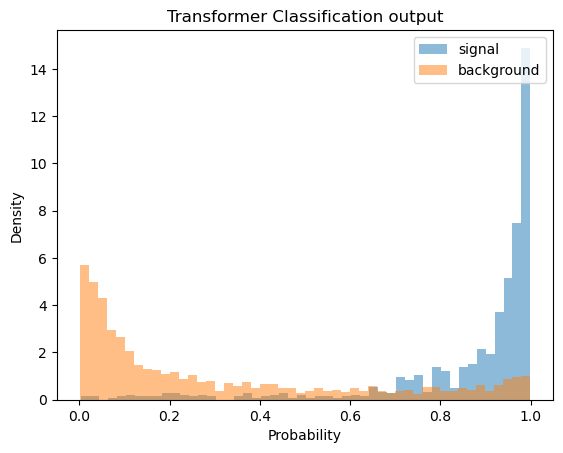

In [27]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load("/home/zhonghua/Filt_Event/transformer/1e10_Ponly/val_preds_best_6.npz", allow_pickle=True)
sig=data["sig"]
bkg=data["bkg"]
np.savetxt("/home/zhonghua/Filt_Event/transformer/1e10_Ponly/val_preds_best_sig_6.txt", sig)
np.savetxt("/home/zhonghua/Filt_Event/transformer/1e10_Ponly/val_preds_best_bkg_6.txt", bkg)

plt.hist(sig, bins=50, alpha=0.5, label='signal', density=True)
plt.hist(bkg, bins=50, alpha=0.5, label='background', density=True)
plt.legend(loc='upper right')
plt.title("Transformer Classification output")
plt.xlabel("Probability")
plt.ylabel("Density")
plt.show()

2351 2351
100000
['label' 'weight' 'R_ue' 'R_mean' 'Eage' 'trueE' 'recE' 'rec_x' 'rec_y'
 'rec_theta' 'rec_phi']
(100000, 11)
(100000,)


ValueError: operands could not be broadcast together with shapes (2351,) (100000,) 

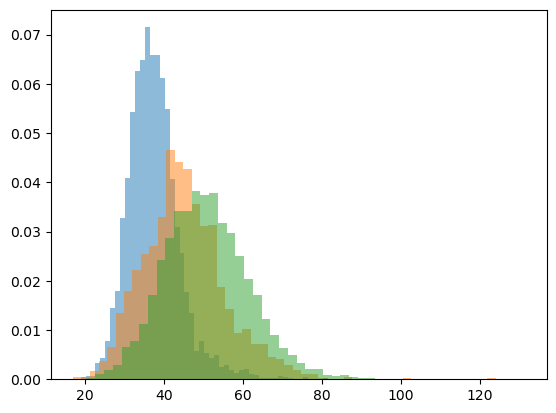

In [2]:
# 分析实验数据异常
import numpy as np
import matplotlib.pyplot as plt
exp_probs=np.load("/home/zhonghua/Filt_Event/transformer/1e10_Ponly/exp_probs.npz", allow_pickle=True)
probs=exp_probs["probs"]
indices=exp_probs["indices"]
print(len(probs), len(indices))
exp_npzfile="/home/zhonghua/data/Dataset_Filted/Experiment/2022/1e10_V03_0110_test.npz"
exp_data = np.load(exp_npzfile, allow_pickle=True)
exp_hitsE = exp_data["hitsE"]
exp_hitsM = exp_data["hitsM"]
exp_params = exp_data["params"]
exp_param_names=exp_data["param_names"]
print(len(exp_params))

#模拟proton
MC_data = np.load("/home/zhonghua/data/Dataset_Filted/1e10_V03/sampled_1e10_V03_dataset.npz", allow_pickle=True)
MC_hitsE = MC_data["hitsE"]
MC_hitsM = MC_data["hitsM"]
MC_params = MC_data["params"]
MC_params = np.array(MC_params, dtype=float)
param_names=MC_data["param_names"]

pr_indices=np.where(MC_params[:,0]==14)
pr_params=np.array(MC_params[pr_indices],dtype=float)

ga_indices=np.where(MC_params[:,0]==1)
ga_params=np.array(MC_params[ga_indices],dtype=float)

mn_indices=np.where(MC_params[:,0]==43)
mn_params=np.array(MC_params[mn_indices],dtype=float)

print(param_names)
col=3
plt.hist(mn_params[:, col], bins=50, alpha=0.5, density=True, label="MC monopole")
plt.hist(ga_params[:, col], bins=50, alpha=0.5, density=True, label="MC gamma")
plt.hist(pr_params[:, col], bins=50, alpha=0.5, density=True, label="MC proton")
# print(exp_params[:,-3]**2+exp_params[:,-4]**2)
# print(len(exp_params[:,-3]**2+exp_params[:,-4]**2), len(probs))
print(np.shape(exp_params)) # (2351, 11)
print(np.shape(exp_params[:,-3]**2+exp_params[:,-4]**2)) # (2351,)
r = np.sqrt(np.array(exp_params[:,-3], dtype=float)**2 + np.array(exp_params[:,-4], dtype=float)**2)
cut_indices=indices[(probs>0.8) & (r<600)]
print(len(cut_indices))
print(np.max(r))
plt.hist(exp_params[cut_indices][:, col], bins=50, alpha=0.5, density=True, label="exp")
plt.xlabel(f"{param_names[col]}")
plt.legend(loc='upper right')
plt.ylabel("Density")
plt.show()



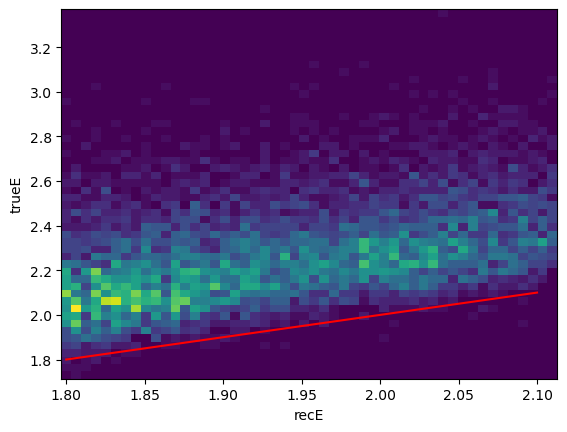

In [ ]:
plt.hist2d(pr_params[:,6], np.log10(pr_params[:,5]/1e3),bins=50, density=True, label="MC proton")
plt.plot([1.8,2.1], [1.8, 2.1], c="r", label="exp")
plt.xlabel(f"{param_names[6]}")
plt.ylabel(f"{param_names[5]}")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
selected_param_names = ["R_mean", "Eage", "trueE", "recE", "rec_x", "rec_y", "rec_theta", "rec_phi"]
ED_pos_file="/home/zhonghua/Filt_Event/config/ED_pos_5216up_20210807.txt"
MD_pos_file="/home/zhonghua/Filt_Event/config/MD_pos_1188.txt"
positions_ED= pd.read_csv(ED_pos_file,  sep=r'\s+', skiprows=1, header=None, names=["id","x","y","z"])
positions_MD= pd.read_csv(MD_pos_file,  sep=r'\s+', skiprows=1, header=None, names=["id","x","y","z"])

exp_npzfile="/home/zhonghua/data/Dataset_Filted/Experiment/2022/1e10_V03_2022_dataset.npz"
exp_data = np.load(exp_npzfile, allow_pickle=True)


new_indices=[]
for n in range(len(exp_params)):
    R_mean=exp_params[n][3]
    if (R_mean<25.0):  
        new_indices.append(n)



7.828228945147305


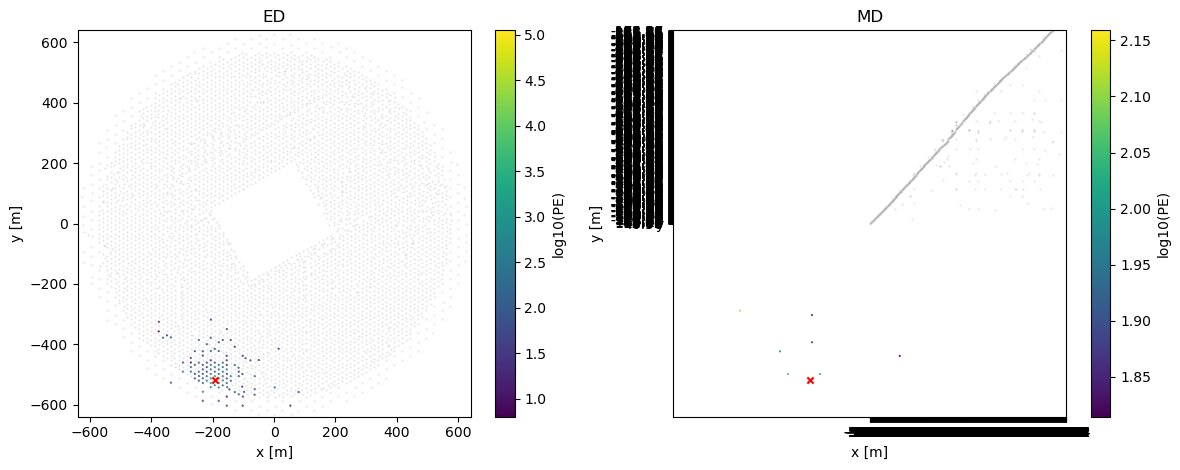

In [33]:

i = 100
i = new_indices[i]
hitsE = exp_data["hitsE"][i]
hitsM = exp_data["hitsM"][i]
params = exp_data["params"][i]
param_names=exp_data["param_names"]
params_dict= dict(zip(exp_data["param_names"], exp_data["params"][i]))
print(params_dict["R_mean"])
fig, axes = plt.subplots(1, 2, figsize=(12, 4.8))

# === 子图1：ED ===
ax = axes[0]
sc1 = ax.scatter(positions_ED["x"], positions_ED["y"], s=1, marker=".", alpha=0.2, color="gray")
sc2 = ax.scatter(hitsE[:, 0], hitsE[:, 1], c=np.log10(hitsE[:, 3]), s=1, marker=".")
ax.scatter(params_dict['rec_x'], params_dict['rec_y'], c="r", s=20, marker="x")
cb1 = plt.colorbar(sc2, ax=ax)
cb1.set_label("log10(PE)")
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_title("ED")
ax.set_xlim(-640, 640)
ax.set_ylim(-640, 640)

# === 子图2：MD ===
ax = axes[1]
sc3 = ax.scatter(positions_MD["x"], positions_MD["y"], s=1, marker=".", alpha=0.2, color="gray")
sc4 = ax.scatter(hitsM[:, 0], hitsM[:, 1], c=np.log10(hitsM[:, 3]), s=1, marker=".")
ax.scatter(params_dict['rec_x'], params_dict['rec_y'], c="r", s=20, marker="x")
cb2 = plt.colorbar(sc4, ax=ax)
cb2.set_label("log10(PE)")
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_title("MD")
ax.set_xlim(-640, 640)
ax.set_ylim(-640, 640)

plt.tight_layout()
plt.show()


In [21]:
# 分析实验数据异常
import numpy as np
import matplotlib.pyplot as plt

exp_npzfile="/home/zhonghua/data/Dataset_Filted/Experiment/2022/1e10_V03_0110_test.npz"
exp_data = np.load(exp_npzfile, allow_pickle=True)
exp_hitsE = exp_data["hitsE"]
exp_hitsM = exp_data["hitsM"]
exp_params = exp_data["params"]
exp_param_names=exp_data["param_names"]

exp_npzfile_no_muon="/home/zhonghua/data/Dataset_Filted/Experiment/2022/1e10_V03_2022_dataset_no_muon.npz"
exp_data_no_muon = np.load(exp_npzfile_no_muon, allow_pickle=True)
exp_hitsE_no_muon = exp_data_no_muon["hitsE"]
exp_hitsM_no_muon = exp_data_no_muon["hitsM"]
exp_params_no_muon = exp_data_no_muon["params"]
exp_param_names_no_muon=exp_data_no_muon["param_names"]

exp_npzfile_little_muon="/home/zhonghua/data/Dataset_Filted/Experiment/2022/1e10_V03_2022_dataset_little_muon.npz"
exp_data_little_muon = np.load(exp_npzfile_little_muon, allow_pickle=True)
exp_hitsE_little_muon = exp_data_little_muon["hitsE"]
exp_hitsM_little_muon = exp_data_little_muon["hitsM"]
exp_params_little_muon = exp_data_little_muon["params"]
exp_param_names_little_muon=exp_data_little_muon["param_names"]


# exp_probs_no=np.load("/home/zhonghua/Filt_Event/transformer/1e10/exp_probs.npz", allow_pickle=True)
# probs_no=exp_probs["probs"]
indices=np.arange(len(exp_params))
#模拟proton
MC_data = np.load("/home/zhonghua/data/Dataset_Filted/1e10_V03/sampled_1e10_V03_dataset.npz", allow_pickle=True)
MC_hitsE = MC_data["hitsE"]
MC_hitsM = MC_data["hitsM"]
MC_params = MC_data["params"]
MC_params = np.array(MC_params, dtype=float)
param_names=MC_data["param_names"]

pr_indices=np.where(MC_params[:,0]==14)
pr_params=np.array(MC_params[pr_indices],dtype=float)

ga_indices=np.where(MC_params[:,0]==1)
ga_params=np.array(MC_params[ga_indices],dtype=float)

mn_indices=np.where(MC_params[:,0]==43)
mn_params=np.array(MC_params[mn_indices],dtype=float)

print(param_names)



['label' 'weight' 'R_ue' 'R_mean' 'Eage' 'trueE' 'recE' 'rec_x' 'rec_y'
 'rec_theta' 'rec_phi']


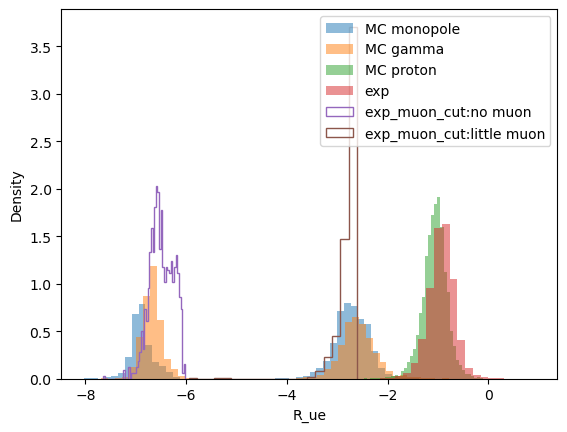

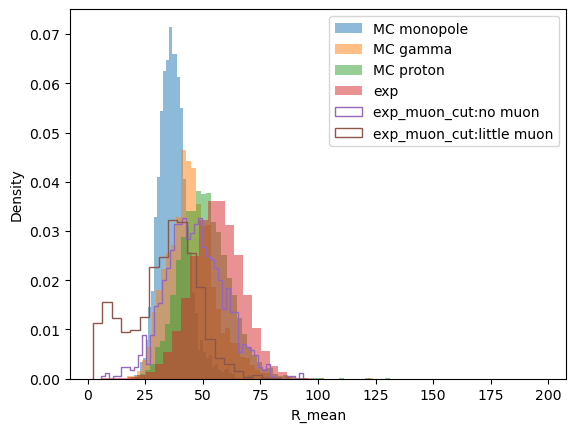

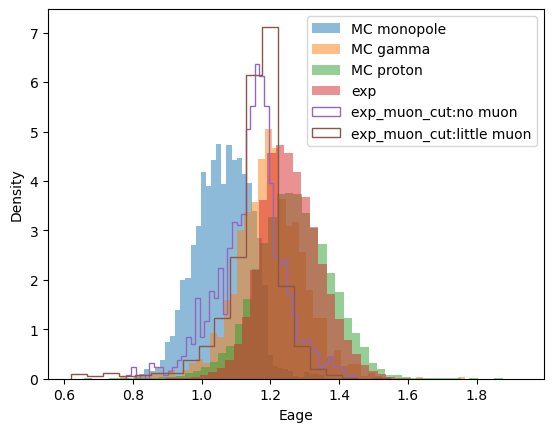

In [25]:
col=2
def plot_param_distribution(col):
    plt.hist(mn_params[:, col], bins=50, alpha=0.5, density=True, label="MC monopole")
    plt.hist(ga_params[:, col], bins=50, alpha=0.5, density=True, label="MC gamma")
    plt.hist(pr_params[:, col], bins=50, alpha=0.5, density=True, label="MC proton")
    # print(exp_params[:,-3]**2+exp_params[:,-4]**2)
    # print(len(exp_params[:,-3]**2+exp_params[:,-4]**2), len(probs))
    r = np.sqrt(np.array(exp_params[:,-3], dtype=float)**2 + np.array(exp_params[:,-4], dtype=float)**2)
    cut_indices=indices[(r<600)]
  
    plt.hist(exp_params[cut_indices][:, col], bins=50, alpha=0.5, density=True, label="exp")
    plt.hist(np.array(exp_params_no_muon)[:, col], bins=50, histtype="step", density=True, label="exp_muon_cut:no muon")
    plt.hist(np.array(exp_params_little_muon)[:, col], bins=20, histtype="step", density=True, label="exp_muon_cut:little muon")
    plt.xlabel(f"{param_names[col]}")
    plt.legend(loc='upper right')
    plt.ylabel("Density")
    plt.show()
plot_param_distribution(2)
plot_param_distribution(3)
plot_param_distribution(4)


In [107]:
npz_file = "/home/zhonghua/data/Dataset_Filted/Experiment/2022/1e10_V03_2022_dataset.npz"
data = np.load(npz_file, allow_pickle=True)
print(data["param_names"])
params=data["params"]
new_indices=[]
rs=[]
for n in range(len(data["params"])):
    R_ue=params[n][2]
    R_mean=params[n][3]
    Eage=params[n][4]
    r= np.sqrt(params[n][-3]**2 + params[n][-4]**2)
    # if (R_ue<-6.0):  # (R_ue<-2.35) and 
    # if (R_mean>18.0) and (Eage>0.8): 
    if (R_ue<-5) and (R_mean>40.0):
        new_indices.append(n)
        rs.append(r)

# 保存筛选后的数据到新文件
output_file = "/home/zhonghua/data/Dataset_Filted/Experiment/2022/1e10_V03_2022_dataset_no_muon.npz"

# 获取所有数组的键名
keys = data.files

# 创建字典来存储筛选后的数据
filtered_data = {}

for key in keys:
    if key == "param_names":  # 对于参数名称，直接保留
        filtered_data[key] = data[key]
    else:  # 对于其他数组，根据筛选的索引提取数据
        filtered_data[key] = data[key][new_indices]

# 保存到新文件
np.savez(output_file, **filtered_data)

print(f"筛选后的数据已保存到: {output_file}")
print(f"原始数据量: {len(data['params'])}")
print(f"筛选后数据量: {len(new_indices)}")

# 验证保存的文件
new_data = np.load(output_file, allow_pickle=True)
print(f"验证 - 新文件中的数据量: {len(new_data['params'])}")

# 关闭文件
data.close()
new_data.close()

['label' 'weight' 'R_ue' 'R_mean' 'Eage' 'trueE' 'recE' 'rec_x' 'rec_y'
 'rec_theta' 'rec_phi']
筛选后的数据已保存到: /home/zhonghua/data/Dataset_Filted/Experiment/2022/1e10_V03_2022_dataset_no_muon.npz
原始数据量: 2351
筛选后数据量: 656
验证 - 新文件中的数据量: 656


[-1 1 -6.509176958103074 45.32249386212805 1.0603632926940918 -1.0
 1.817281723022461 17.67007064819336 287.602783203125 0.31284305453300476
 5.9729461669921875]
53
155
[-1 1 -6.5548797164599755 40.095439613143604 1.1014673709869385 -1.0
 1.831383228302002 -516.6288452148438 -10.253005027770996
 0.261149138212204 6.001116752624512]


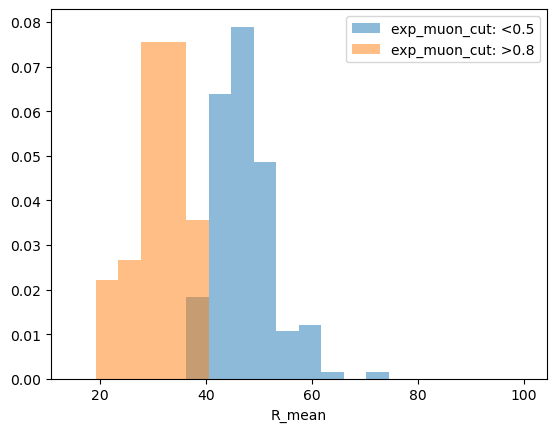

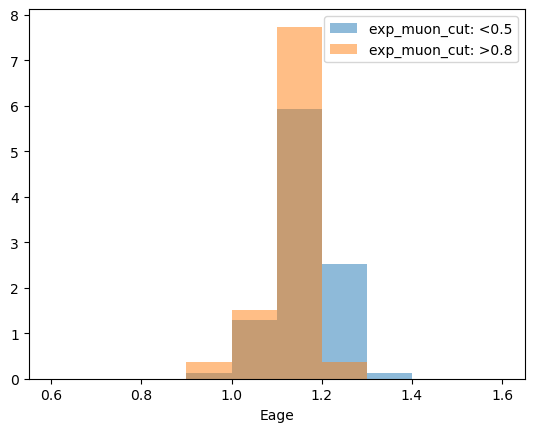

In [ ]:
ED_pos_file="/home/zhonghua/Filt_Event/config/ED_pos_5216up_20210807.txt"
MD_pos_file="/home/zhonghua/Filt_Event/config/MD_pos_1188.txt"
positions_ED= pd.read_csv(ED_pos_file,  sep=r'\s+', skiprows=1, header=None, names=["id","x","y","z"])
positions_MD= pd.read_csv(MD_pos_file,  sep=r'\s+', skiprows=1, header=None, names=["id","x","y","z"])


exp_npzfile="/home/zhonghua/data/Dataset_Filted/Experiment/2022/1e10_V03_2022_dataset_optimized.npz"
exp_data = np.load(exp_npzfile, allow_pickle=True)
exp_hitsE = exp_data["hitsE"]
exp_hitsM = exp_data["hitsM"]
exp_params = exp_data["params"]
print(exp_params[1])
exp_param_names=exp_data["param_names"]

probs_data = np.load("/home/zhonghua/Filt_Event/transformer/1e10_Ponly/exp_probs.npz", allow_pickle=True)
probs = probs_data["probs"]
indices = probs_data["indices"]
new_indices=[]
for n in range(len(exp_params)):
    prob=probs[n]
    if (prob>0.8):
        new_indices.append(n)
print(len(new_indices))

new_indices_1=[]
for n in range(len(exp_params)):
    prob=probs[n]
    if (prob<0.5):
        new_indices_1.append(n)
print(len(new_indices_1))

col=3
print(exp_params[new_indices_1][col])
plt.hist(exp_params[new_indices_1][:,col], bins=20, alpha=0.5,range=(15,100), density=True, label="exp_muon_cut: <0.5")
plt.hist(exp_params[new_indices][:,col], bins=20, alpha=0.5,range=(15,100), density=True, label="exp_muon_cut: >0.8")
plt.xlabel(f"{param_names[col]}")
plt.legend(loc='upper right')
plt.show()

col=4
plt.hist(exp_params[new_indices_1][:,col], bins=10, alpha=0.5,range=(0.6,1.6), density=True, label="exp_muon_cut: <0.5")
plt.hist(exp_params[new_indices][:,col], bins=10, alpha=0.5,range=(0.6,1.6), density=True, label="exp_muon_cut: >0.8")
plt.xlabel(f"{param_names[col]}")
plt.legend(loc='upper right')
plt.show()


# for i in range(20):
#     i = new_indices[i]
#     hitsE = exp_data["hitsE"][i]
#     hitsM = exp_data["hitsM"][i]    
#     params = exp_data["params"][i]
#     param_names=exp_data["param_names"]

#     params_dict= dict(zip(exp_data["param_names"], exp_data["params"][i]))
#     print(f"R_ue: {params_dict['R_ue']}, R_mean: {params_dict['R_mean']},  Eage: {params_dict['Eage']}")
#     r=np.sqrt(params_dict['rec_x']**2 + params_dict['rec_y']**2)
#     print(f"r: {r}")
#     print(f"theta: {params_dict['rec_theta']*180/np.pi}, phi: {params_dict['rec_phi']*180/np.pi}")
#     print(f"recE={params_dict['recE']}, trueE={params_dict['trueE']}")
#     fig, axes = plt.subplots(1, 2, figsize=(12, 4.8))

#     # === 子图1：ED ===
#     ax = axes[0]
#     sc1 = ax.scatter(positions_ED["x"], positions_ED["y"], s=1, marker=".", alpha=0.2, color="gray")
#     sc2 = ax.scatter(hitsE[:, 0], hitsE[:, 1], c=np.log10(hitsE[:, 3]), s=1, marker=".")
#     ax.scatter(params_dict['rec_x'], params_dict['rec_y'], c="r", s=20, marker="x")
#     cb1 = plt.colorbar(sc2, ax=ax)
#     cb1.set_label("log10(PE)")
#     ax.set_xlabel("x [m]")
#     ax.set_ylabel("y [m]")
#     ax.set_title("ED")
#     ax.set_xlim(-640, 640)
#     ax.set_ylim(-640, 640)

#     # === 子图2：MD ===
#     ax = axes[1]
#     # sc3 = ax.scatter(positions_MD["x"], positions_MD["y"], s=1, marker=".", alpha=0.2, color="gray")
#     sc4 = ax.scatter(hitsM[:, 0], hitsM[:, 1], c=np.log10(hitsM[:, 3]), s=1, marker=".")
#     ax.scatter(params_dict['rec_x'], params_dict['rec_y'], c="r", s=20, marker="x")
#     cb2 = plt.colorbar(sc4, ax=ax)
#     cb2.set_label("log10(PE)")
#     ax.set_xlabel("x [m]")
#     ax.set_ylabel("y [m]")
#     ax.set_title("MD")
#     ax.set_xlim(-640, 640)
#     ax.set_ylim(-640, 640)

#     plt.tight_layout()
#     plt.show()
# # plt.scatter(positions_MD["x"], positions_MD["y"], s=1, marker=".", alpha=0.2, color="gray")
# plt.scatter(hitsM[:, 0], hitsM[:, 1], c=np.log10(hitsM[:, 3]), s=1, marker=".")
# plt.colorbar(label="log10(PM)")
# plt.xlabel("x [m]")
# plt.ylabel("y [m]")
# plt.title("MD")
# plt.xlim(-640, 640)
# plt.ylim(-640, 640)
# plt.show()


[-1 1 -6.2741637358031355 49.610126012591415 1.058570384979248 -1.0
 1.8753780126571655 583.8870239257812 36.00007629394531
 0.21840207278728485 1.3019764423370361]
114
498
[-1 1 -6.27209530018532 49.635142171125416 1.149295687675476 -1.0
 1.8645082712173462 572.2822875976562 -85.9709243774414
 0.12777794897556305 4.349277973175049]


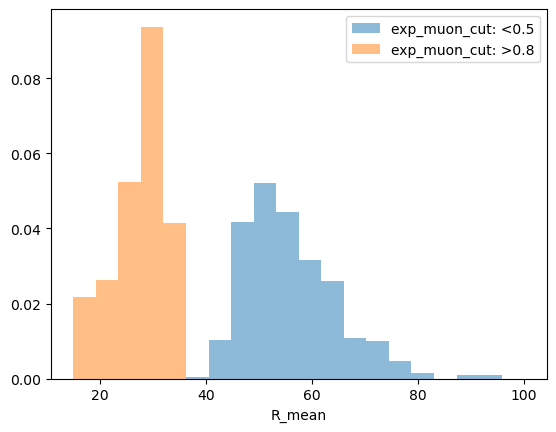

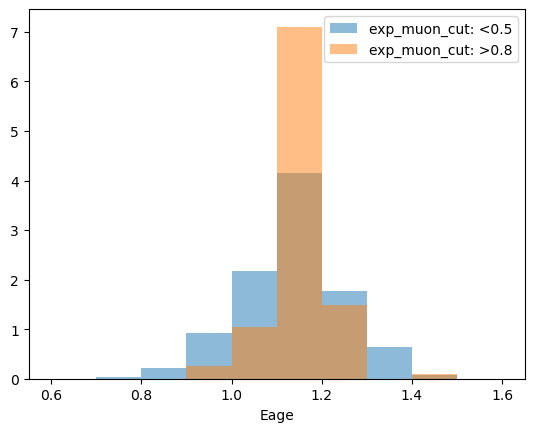

R_ue: -6.800739894034277, R_mean: 27.510756594829044,  Eage: 1.1903026103973389
r: 524.1337594905781
theta: 9.055538226136482, phi: 264.659421129699
recE=1.935124397277832, trueE=-1.0


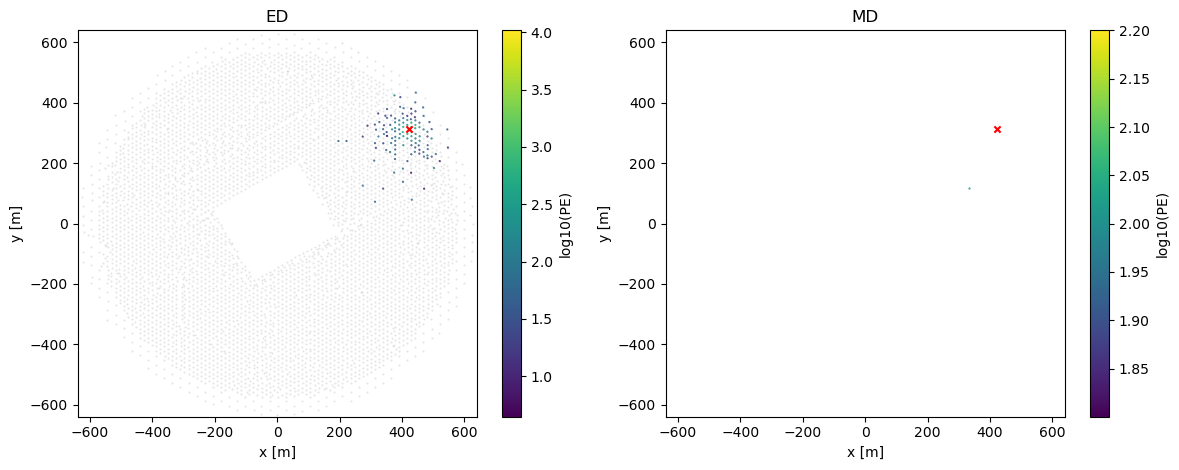

R_ue: -6.110517477223634, R_mean: 23.06056871760382,  Eage: 1.4081212282180786
r: 581.0840263788916
theta: 36.304108344396916, phi: 65.68750019152174
recE=1.8362959623336792, trueE=-1.0


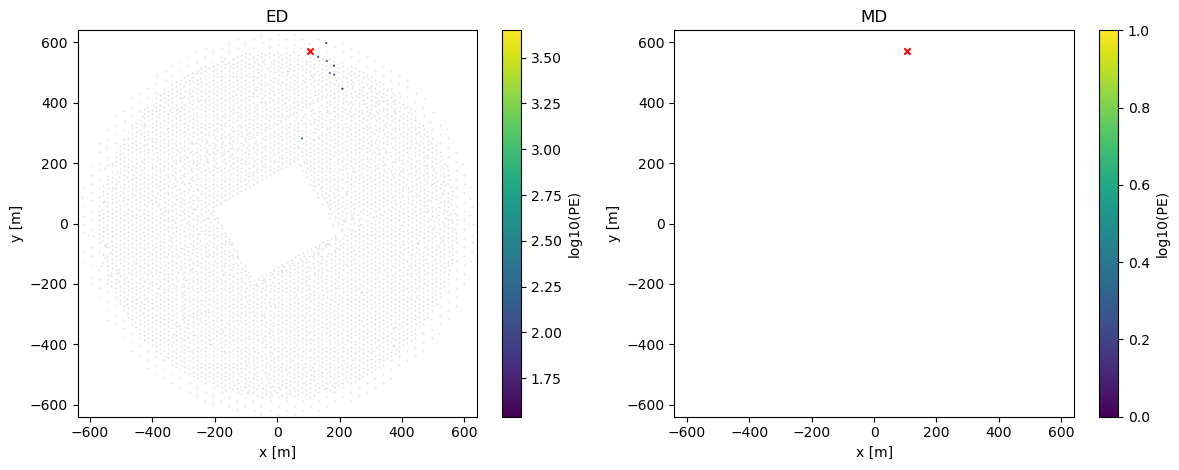

R_ue: -6.2741637358031355, R_mean: 49.610126012591415,  Eage: 1.058570384979248
r: 584.9957796446704
theta: 12.513517007620429, phi: 74.59775517137017
recE=1.8753780126571655, trueE=-1.0


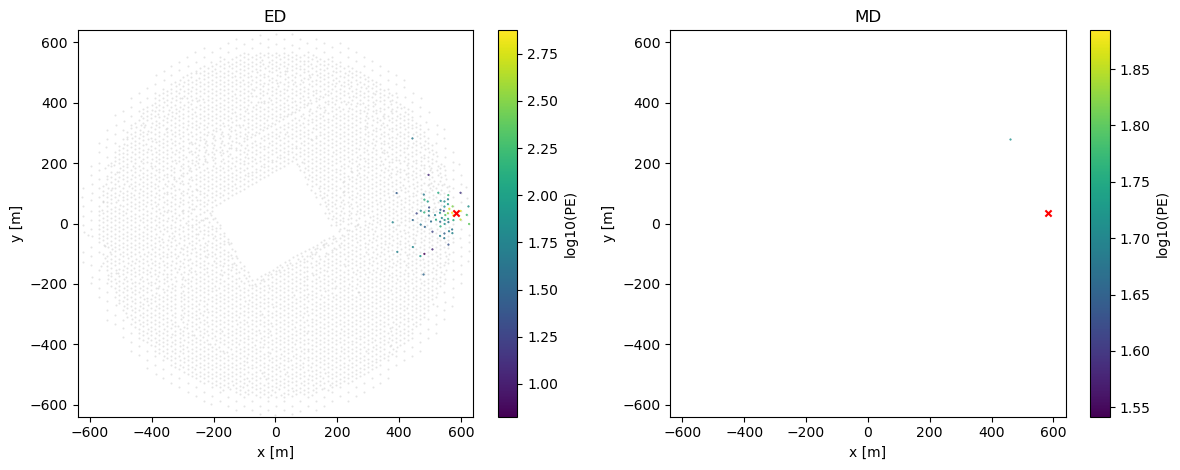

R_ue: -6.327228904747992, R_mean: 68.82787281974397,  Eage: 1.1292263269424438
r: 599.814424180204
theta: 32.463445162774555, phi: 69.77557331544946
recE=1.919657826423645, trueE=-1.0


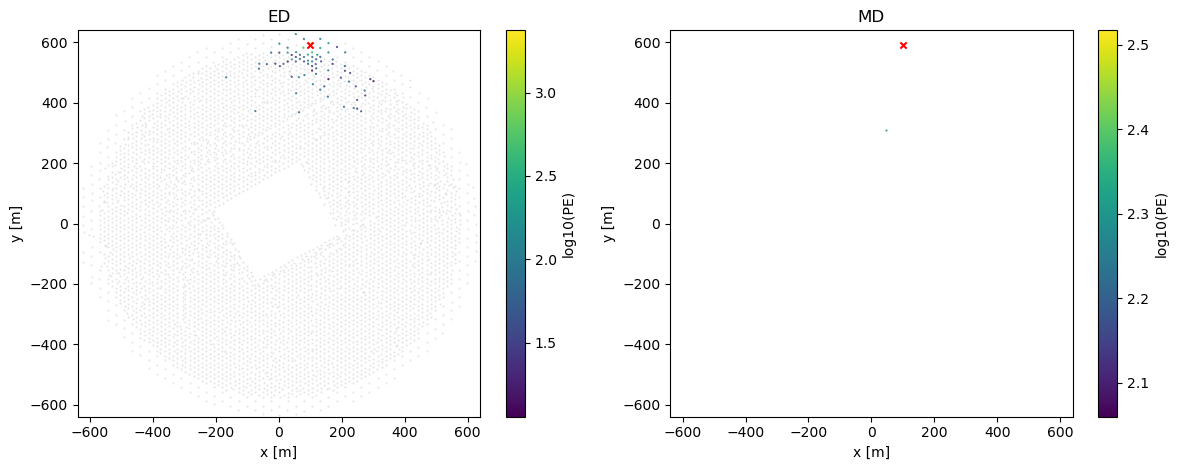

R_ue: -6.084988308048855, R_mean: 71.03377124000326,  Eage: 0.9881172180175781
r: 588.605571648148
theta: 10.618664583734336, phi: 345.4465161420163
recE=1.7999789714813232, trueE=-1.0


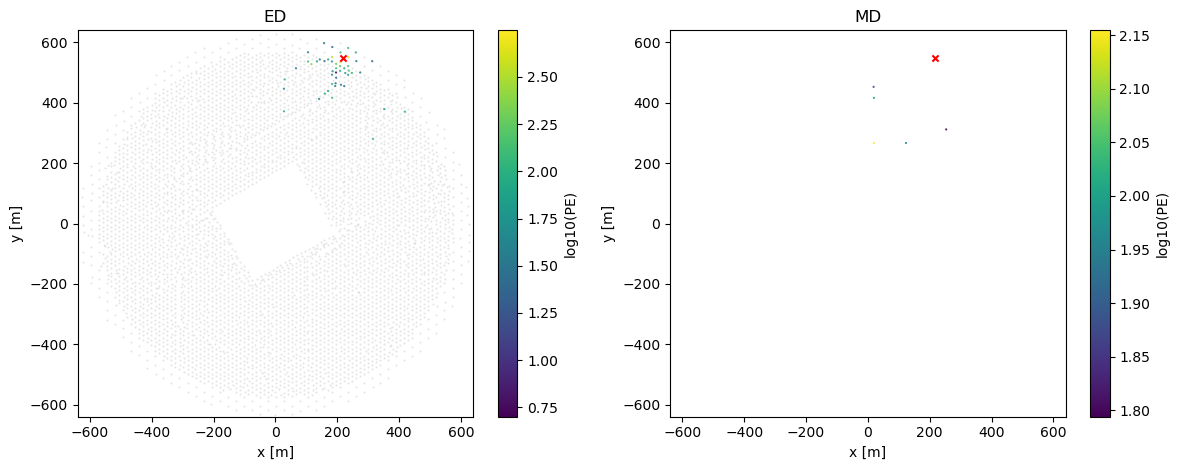

R_ue: -6.27209530018532, R_mean: 49.635142171125416,  Eage: 1.149295687675476
r: 578.7037381392298
theta: 7.321137191137744, phi: 249.19527179214316
recE=1.8645082712173462, trueE=-1.0


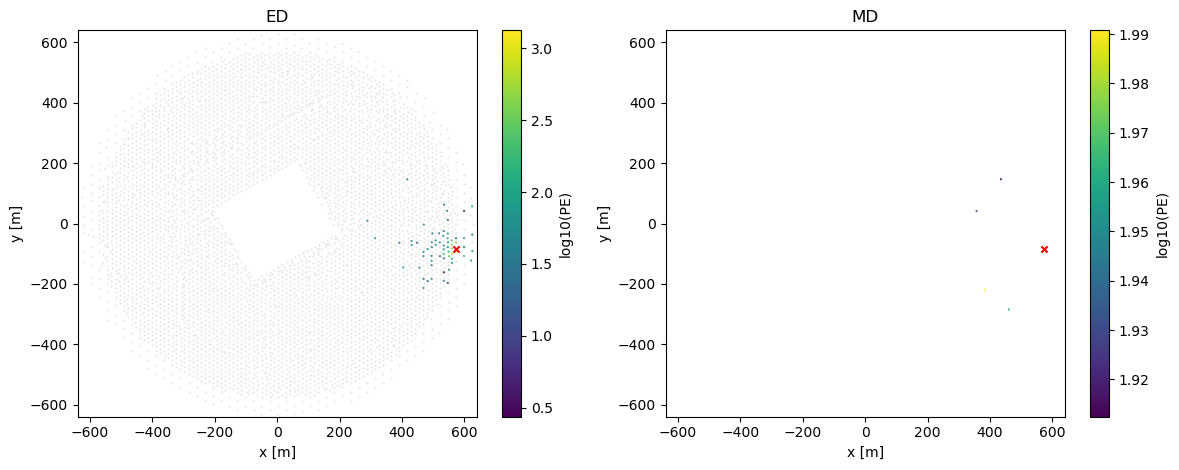

R_ue: -6.388680189351168, R_mean: 52.38539259029668,  Eage: 0.9956604242324829
r: 587.997653083852
theta: 9.068935642193463, phi: 163.00077065544014
recE=2.0906054973602295, trueE=-1.0


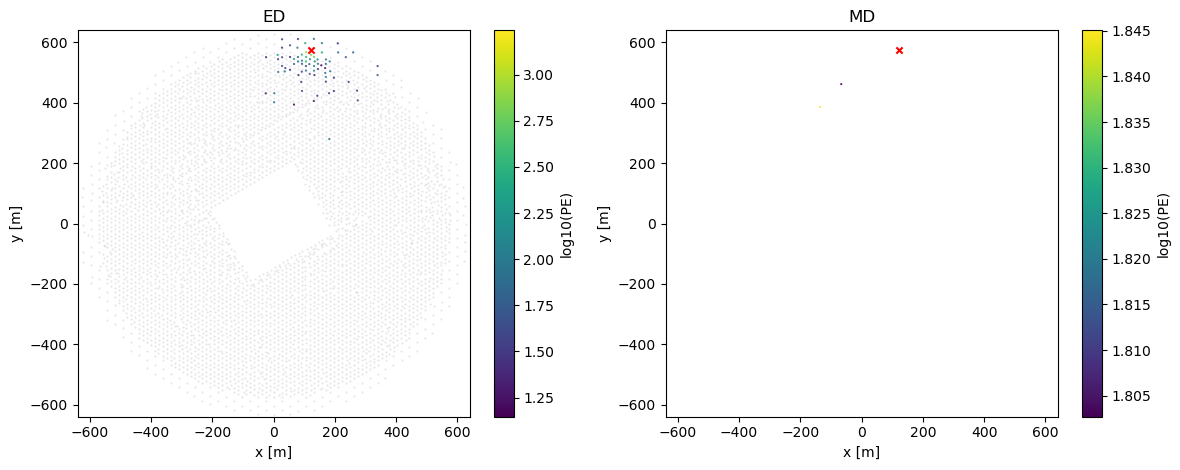

R_ue: -6.509176958103074, R_mean: 45.32249386212805,  Eage: 1.0603632926940918
r: 288.1450889793124
theta: 17.92458667472223, phi: 342.22460662749455
recE=1.817281723022461, trueE=-1.0


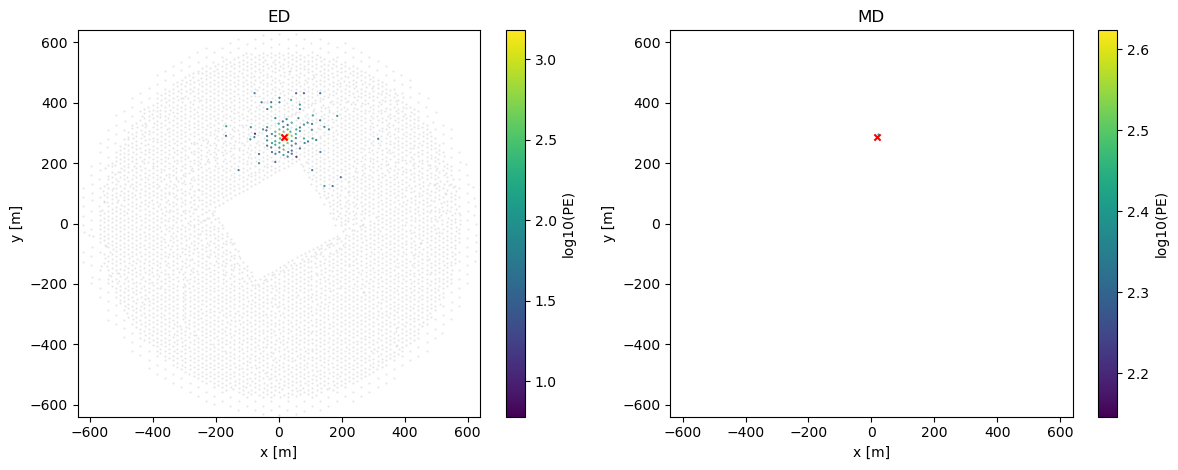

R_ue: -6.525271839489307, R_mean: 46.769936921877836,  Eage: 1.1621655225753784
r: 467.6308127884525
theta: 13.367864389762305, phi: 137.9078167769722
recE=1.8613576889038086, trueE=-1.0


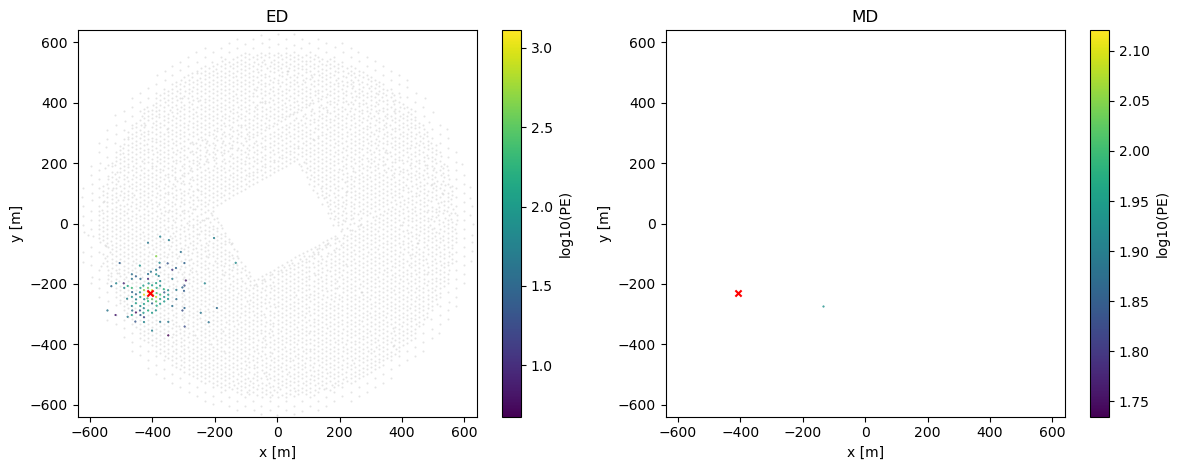

R_ue: -6.730399871108632, R_mean: 50.81824827700379,  Eage: 1.1534377336502075
r: 270.5764367288996
theta: 30.9833636602003, phi: 76.23325762850806
recE=1.9360463619232178, trueE=-1.0


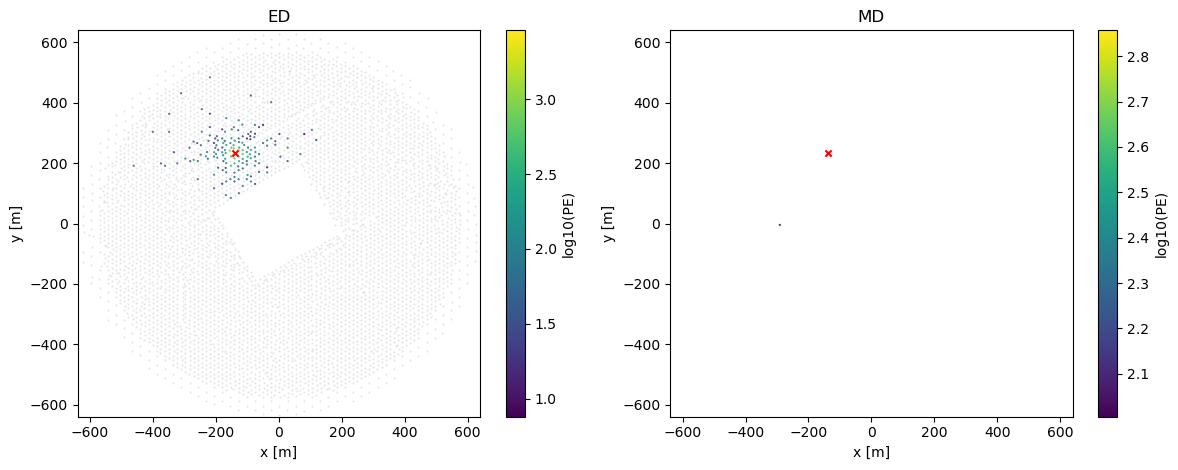

R_ue: -6.1080822784998015, R_mean: 87.61081653161285,  Eage: 1.2226399183273315
r: 595.2417578894016
theta: 15.10989645361124, phi: 324.5540603012145
recE=1.9348385334014893, trueE=-1.0


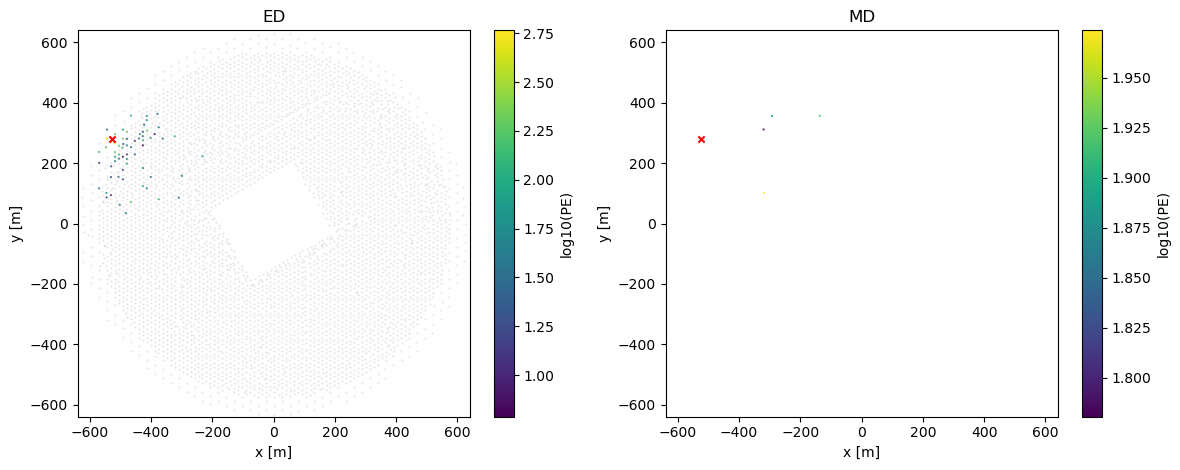

R_ue: -6.362520168837634, R_mean: 57.39471244746176,  Eage: 1.1624350547790527
r: 574.1137575610442
theta: 21.984215475851443, phi: 51.014518986285154
recE=1.8632473945617676, trueE=-1.0


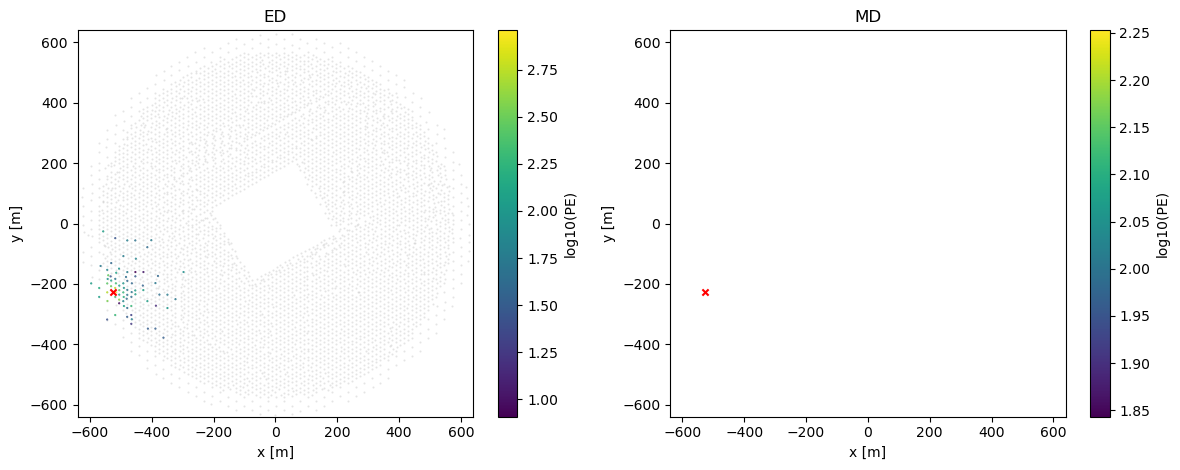

In [100]:


exp_npzfile="/home/zhonghua/data/Dataset_Filted/Experiment/2022/1e10_V03_2022_dataset_little_muon.npz"
probs_data = np.load("/home/zhonghua/Filt_Event/transformer/1e10_Ponly/exp_probs_little.npz", allow_pickle=True)

exp_npzfile="/home/zhonghua/data/Dataset_Filted/Experiment/2022/1e10_V03_2022_dataset_no_muon.npz"
probs_data = np.load("/home/zhonghua/Filt_Event/transformer/1e10_Ponly/exp_probs_no.npz", allow_pickle=True)


exp_data = np.load(exp_npzfile, allow_pickle=True)
exp_hitsE = exp_data["hitsE"]
exp_hitsM = exp_data["hitsM"]
exp_params = exp_data["params"]
print(exp_params[1])
exp_param_names=exp_data["param_names"]

probs = probs_data["probs"]
indices = probs_data["indices"]
new_indices=[]
for n in range(len(exp_params)):
    prob=probs[n]
    if (prob>0.9):
        new_indices.append(n)
print(len(new_indices))

new_indices_1=[]
for n in range(len(exp_params)):
    prob=probs[n]
    if (prob<0.2):
        new_indices_1.append(n)
print(len(new_indices_1))

col=3
print(exp_params[new_indices_1][col])
plt.hist(exp_params[new_indices_1][:,col], bins=20, alpha=0.5,range=(15,100), density=True, label="exp_muon_cut: <0.5")
plt.hist(exp_params[new_indices][:,col], bins=20, alpha=0.5,range=(15,100), density=True, label="exp_muon_cut: >0.8")
plt.xlabel(f"{param_names[col]}")
plt.legend(loc='upper right')
plt.show()

col=4
plt.hist(exp_params[new_indices_1][:,col], bins=10, alpha=0.5,range=(0.6,1.6), density=True, label="exp_muon_cut: <0.5")
plt.hist(exp_params[new_indices][:,col], bins=10, alpha=0.5,range=(0.6,1.6), density=True, label="exp_muon_cut: >0.8")
plt.xlabel(f"{param_names[col]}")
plt.legend(loc='upper right')
plt.show()

for i in range(2,4):
    i = new_indices[i]
    hitsE = exp_data["hitsE"][i]
    hitsM = exp_data["hitsM"][i]    
    params = exp_data["params"][i]
    param_names=exp_data["param_names"]

    params_dict= dict(zip(exp_data["param_names"], exp_data["params"][i]))
    print(f"R_ue: {params_dict['R_ue']}, R_mean: {params_dict['R_mean']},  Eage: {params_dict['Eage']}")
    r=np.sqrt(params_dict['rec_x']**2 + params_dict['rec_y']**2)
    print(f"r: {r}")
    print(f"theta: {params_dict['rec_theta']*180/np.pi}, phi: {params_dict['rec_phi']*180/np.pi}")
    print(f"recE={params_dict['recE']}, trueE={params_dict['trueE']}")
    fig, axes = plt.subplots(1, 2, figsize=(12, 4.8))

    # === 子图1：ED ===
    ax = axes[0]
    sc1 = ax.scatter(positions_ED["x"], positions_ED["y"], s=1, marker=".", alpha=0.2, color="gray")
    sc2 = ax.scatter(hitsE[:, 0], hitsE[:, 1], c=np.log10(hitsE[:, 3]), s=1, marker=".")
    ax.scatter(params_dict['rec_x'], params_dict['rec_y'], c="r", s=20, marker="x")
    cb1 = plt.colorbar(sc2, ax=ax)
    cb1.set_label("log10(PE)")
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_title("ED")
    ax.set_xlim(-640, 640)
    ax.set_ylim(-640, 640)

    # === 子图2：MD ===
    ax = axes[1]
    # sc3 = ax.scatter(positions_MD["x"], positions_MD["y"], s=1, marker=".", alpha=0.2, color="gray")
    sc4 = ax.scatter(hitsM[:, 0], hitsM[:, 1], c=np.log10(hitsM[:, 3]), s=1, marker=".")
    ax.scatter(params_dict['rec_x'], params_dict['rec_y'], c="r", s=20, marker="x")
    cb2 = plt.colorbar(sc4, ax=ax)
    cb2.set_label("log10(PE)")
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_title("MD")
    ax.set_xlim(-640, 640)
    ax.set_ylim(-640, 640)

    plt.tight_layout()
    plt.show()
for i in range(0,10):
    i = new_indices_1[i]
    hitsE = exp_data["hitsE"][i]
    hitsM = exp_data["hitsM"][i]    
    params = exp_data["params"][i]
    param_names=exp_data["param_names"]

    params_dict= dict(zip(exp_data["param_names"], exp_data["params"][i]))
    print(f"R_ue: {params_dict['R_ue']}, R_mean: {params_dict['R_mean']},  Eage: {params_dict['Eage']}")
    r=np.sqrt(params_dict['rec_x']**2 + params_dict['rec_y']**2)
    print(f"r: {r}")
    print(f"theta: {params_dict['rec_theta']*180/np.pi}, phi: {params_dict['rec_phi']*180/np.pi}")
    print(f"recE={params_dict['recE']}, trueE={params_dict['trueE']}")
    fig, axes = plt.subplots(1, 2, figsize=(12, 4.8))

    # === 子图1：ED ===
    ax = axes[0]
    sc1 = ax.scatter(positions_ED["x"], positions_ED["y"], s=1, marker=".", alpha=0.2, color="gray")
    sc2 = ax.scatter(hitsE[:, 0], hitsE[:, 1], c=np.log10(hitsE[:, 3]), s=1, marker=".")
    ax.scatter(params_dict['rec_x'], params_dict['rec_y'], c="r", s=20, marker="x")
    cb1 = plt.colorbar(sc2, ax=ax)
    cb1.set_label("log10(PE)")
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_title("ED")
    ax.set_xlim(-640, 640)
    ax.set_ylim(-640, 640)

    # === 子图2：MD ===
    ax = axes[1]
    # sc3 = ax.scatter(positions_MD["x"], positions_MD["y"], s=1, marker=".", alpha=0.2, color="gray")
    sc4 = ax.scatter(hitsM[:, 0], hitsM[:, 1], c=np.log10(hitsM[:, 3]), s=1, marker=".")
    ax.scatter(params_dict['rec_x'], params_dict['rec_y'], c="r", s=20, marker="x")
    cb2 = plt.colorbar(sc4, ax=ax)
    cb2.set_label("log10(PE)")
    ax.set_xlabel("x [m]")
    ax.set_ylabel("y [m]")
    ax.set_title("MD")
    ax.set_xlim(-640, 640)
    ax.set_ylim(-640, 640)

    plt.tight_layout()
    plt.show()
